# 1. csv 형식 데이터 판다스 데이터프레임 입력

In [1]:
import pandas as pd

data = pd.read_csv('./netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


## 1) 넷플릭스 프로그램 제작 년도 집계 데이터
 - 필요한 변수 : release_year

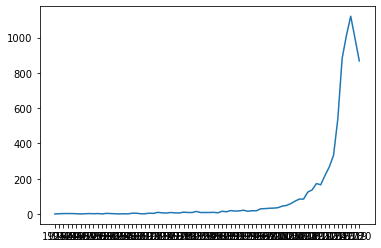

1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Length: 73, dtype: int64


In [44]:
import matplotlib.pyplot as plt

lists = []
for re in data['release_year']:
    lists.append(str(re))

wordCount = {} 
wordCounts = []
 # word -> count 기준 정렬한 dictionary
for word in lists:
    # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    wordCount[word] = wordCount.get(word, 0) + 1 
    
keys = sorted(wordCount.items(),key=(lambda x:x[0]),reverse=False)

ratio = []
labels = []
for word in keys:
    ratio.append(word[1])
    labels.append(word[0])
    lists.append(word[0])  
    wordCounts.append(word[1])

x_values = labels[:-1]	# x축 지점의 값들
y_values = ratio[:-1]	# y축 지점의 값들
plt.plot(x_values, y_values)	# line 그래프를 그립니다
plt.show()	# 그래프를 화면에 보여줍니다    

keys = dict(keys)
to_pd = pd.Series(keys)
print(to_pd)

to_pd.to_csv("release_year.csv",mode="w")

## 2) 프로그램 캐스팅 배우 빈도 측정

In [45]:
import matplotlib.pyplot as plt

castings = []

for cast in data['cast']:
    caster_list = str(cast).replace(","," ")
    caster_list = caster_list.split("  ")
    for caster in caster_list:
        castings.append(caster)

wordCount = {} 
wordCounts = []
 # word -> count 기준 정렬한 dictionary
for word in castings:
    # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    wordCount[word] = wordCount.get(word, 0) + 1 
    
castings = sorted(wordCount.items(),key=(lambda x:x[1]),reverse=True)

ratio = []
labels = []

for word in castings[1:]:
    ratio.append(word[1])
    labels.append(word[0])
    lists.append(word[0])  
    wordCounts.append(word[1])


castings = dict(castings[1:])
to_pd = pd.Series(castings)

to_pd.to_csv("casting_ratio.csv",mode="w")

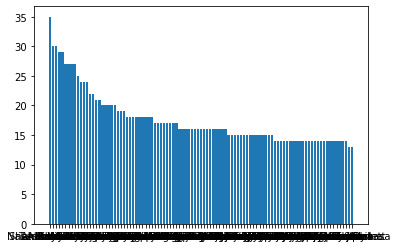

In [46]:
x_values = labels[1:100]	# x축 지점의 값들
y_values = ratio[1:100]	# y축 지점의 값들
plt.bar(x_values, y_values)	# bar 그래프를 그립니다
plt.show()	# 그래프를 화면에 보여줍니다   

## 3) 프로그램 타입 파이 차트 분석

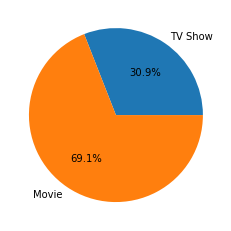

In [56]:
data = pd.read_csv('./netflix.csv')
type_unique = data['type'].value_counts(ascending=True)

ratio = [float(type_unique['TV Show']), float(type_unique['Movie'])]
labels = ['TV Show', 'Movie']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

student_card = pd.DataFrame([['TV Show', type_unique['TV Show']],['Movie', type_unique['Movie']]])   
student_card.to_csv("programtype_ratio.csv",mode="w")

## 4) 넷플릭스 작품 설명에서 가장 많이 사용한 키워드

In [50]:
data = pd.read_csv('./netflix.csv')
letter = ""
for le in data['description']:
    letter = letter + str(le) + " "

## 5) 2021년 전세계 기준 넷플릭스 최고의 프로그램

In [57]:
import pandas as pd
data = pd.read_csv('./netflix_crolling.csv')
top_movie = data['top_movie'][0]
top_movie_score = data['top_movie_score'][0]
top_tv = data['top_tv'][0]
top_tv_score = data['top_tv_score'][0]

top_tv_score = top_tv_score.replace("[","")
top_tv_score = top_tv_score.replace("]","")
top_tv_score = top_tv_score.split(", ")
top_tv_score = list(map(int, top_tv_score))

top_tv = top_tv.replace("[","")
top_tv = top_tv.replace("]","")
top_tv = top_tv.replace("'","")
top_tv= top_tv.split(", ")

top_movie_score = top_movie_score.replace("[","")
top_movie_score = top_movie_score.replace("]","")
top_movie_score = top_movie_score.split(", ")
top_movie_score = list(map(int, top_movie_score))

top_movie = top_movie.replace("[","")
top_movie = top_movie.replace("]","")
top_movie = top_movie.replace("'","")
top_movie = top_movie.split(", ")

lists =[]
for i in range(0,len(top_movie)):
    lists.append([top_movie[i],top_movie_score[i],top_tv[i],top_tv_score[i]])
list_df = pd.DataFrame(lists)
list_df.to_csv("world_top_program.csv",mode="w")

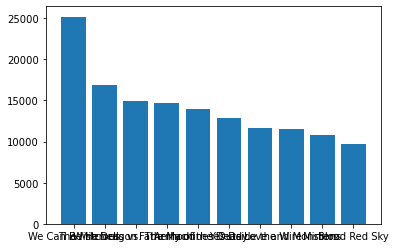

In [50]:
import matplotlib.pyplot as plt
x_values = top_movie	# x축 지점의 값들
y_values = top_movie_score	# y축 지점의 값들
plt.bar(x_values, y_values)	# bar 그래프를 그립니다
plt.show()	# 그래프를 화면에 보여줍니다   

### Regular Expression

In [51]:
import re
letter = re.sub('[^a-zA-Z]',' ',letter)

###  소문자 변환 & 토큰화

In [52]:
letter = letter.lower()
words = letter.split(" ")
words = list(filter(('').__ne__, words))

### 불용어 제거
NLTK 자체는 내장되어 있지만 특정 불용어 규칙을 사용하기 위해서는 nltk data 에서 원하는 불용어 규칙을
다운받은 다음 (Win 일 경우)  C/nltk-data/corpora/다운받은 불용어 규칙
www.nltk.org/nltk_data

In [53]:
import nltk
from nltk.corpus import stopwords
stopword = stopwords.words('english')

In [54]:
words = [w for w in words if not w in stopwords.words('english')]

### Stemming - 어간 추출, 형태소 분석기 사용

In [40]:
#  스노우볼 스테머의 사용
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]

### Lemmatization (음소 표기법) - 동음이의어 등

In [41]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
words = [wordnet_lemmatizer.lemmatize(w) for w in words]

### 단어 빈도수 측정

In [42]:
wordCount = {} 
wordCounts = []
 # word -> count 기준 정렬한 dictionary
for word in words:
    # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
    wordCount[word] = wordCount.get(word, 0) + 1 
    
keys = sorted(wordCount.items(),key=(lambda x:x[1]),reverse=True)

ratio = []
labels = []
lists = []
for word in keys:
    ratio.append(word[1])
    labels.append(word[0])
    lists.append(word[0])  
    wordCounts.append(word[1])


keys = dict(keys)
to_pd = pd.Series(keys)
to_pd.to_csv("description_wording.csv",mode="w")

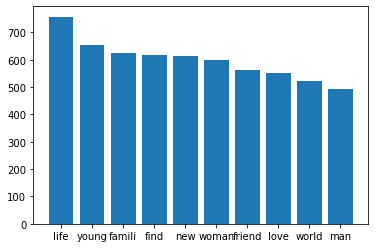

In [43]:
import matplotlib.pyplot as plt
x_values = labels[:10]	# x축 지점의 값들
y_values = ratio[:10]	# y축 지점의 값들
plt.bar(x_values, y_values)	# bar 그래프를 그립니다
plt.show()	# 그래프를 화면에 보여줍니다    


### 빈도 낮은 단어 제거

In [ ]:
threshold = 3

words_cnt = len(words)
words_freq = 0

#빈도수가 낮은 데이터
rare_cnt = 0
rare_freq = 0

for key,value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    
    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value

print("전체 단어 수 :", words_cnt)
print("빈도가 {} 이하인 희귀 단어 수 : {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율: {}".format((rare_cnt / words_cnt) *100))
print("희귀 단어 등장 빈도 비율: {}".format((rare_freq / words_freq)*100))